# Imports

In [3]:
import pandas as pd
import os

# Loading the Dataset

In [4]:
# Selecting the file Path

input = ("/Users/arrryyy/Desktop/bank/data/bank-full.csv")

#Including panadas dataframe
df  = pd.read_csv(input, sep=';')

# EDA Techniques to begin with

## Data Overview

In [18]:
#Testing number of rows and columns
df.shape

(45211, 17)

In [31]:
input = ("/Users/arrryyy/Desktop/bank/data/processed/bank_full_encoded.csv")
dtf = pd.read_csv(input, sep= ';')
dtf.shape

(45211, 1)

In [19]:
# Viewing first rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
# Summary stats
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
# Check data types and missing values:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Univariate Analysis

In [22]:
# Value counts of categorical variables
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

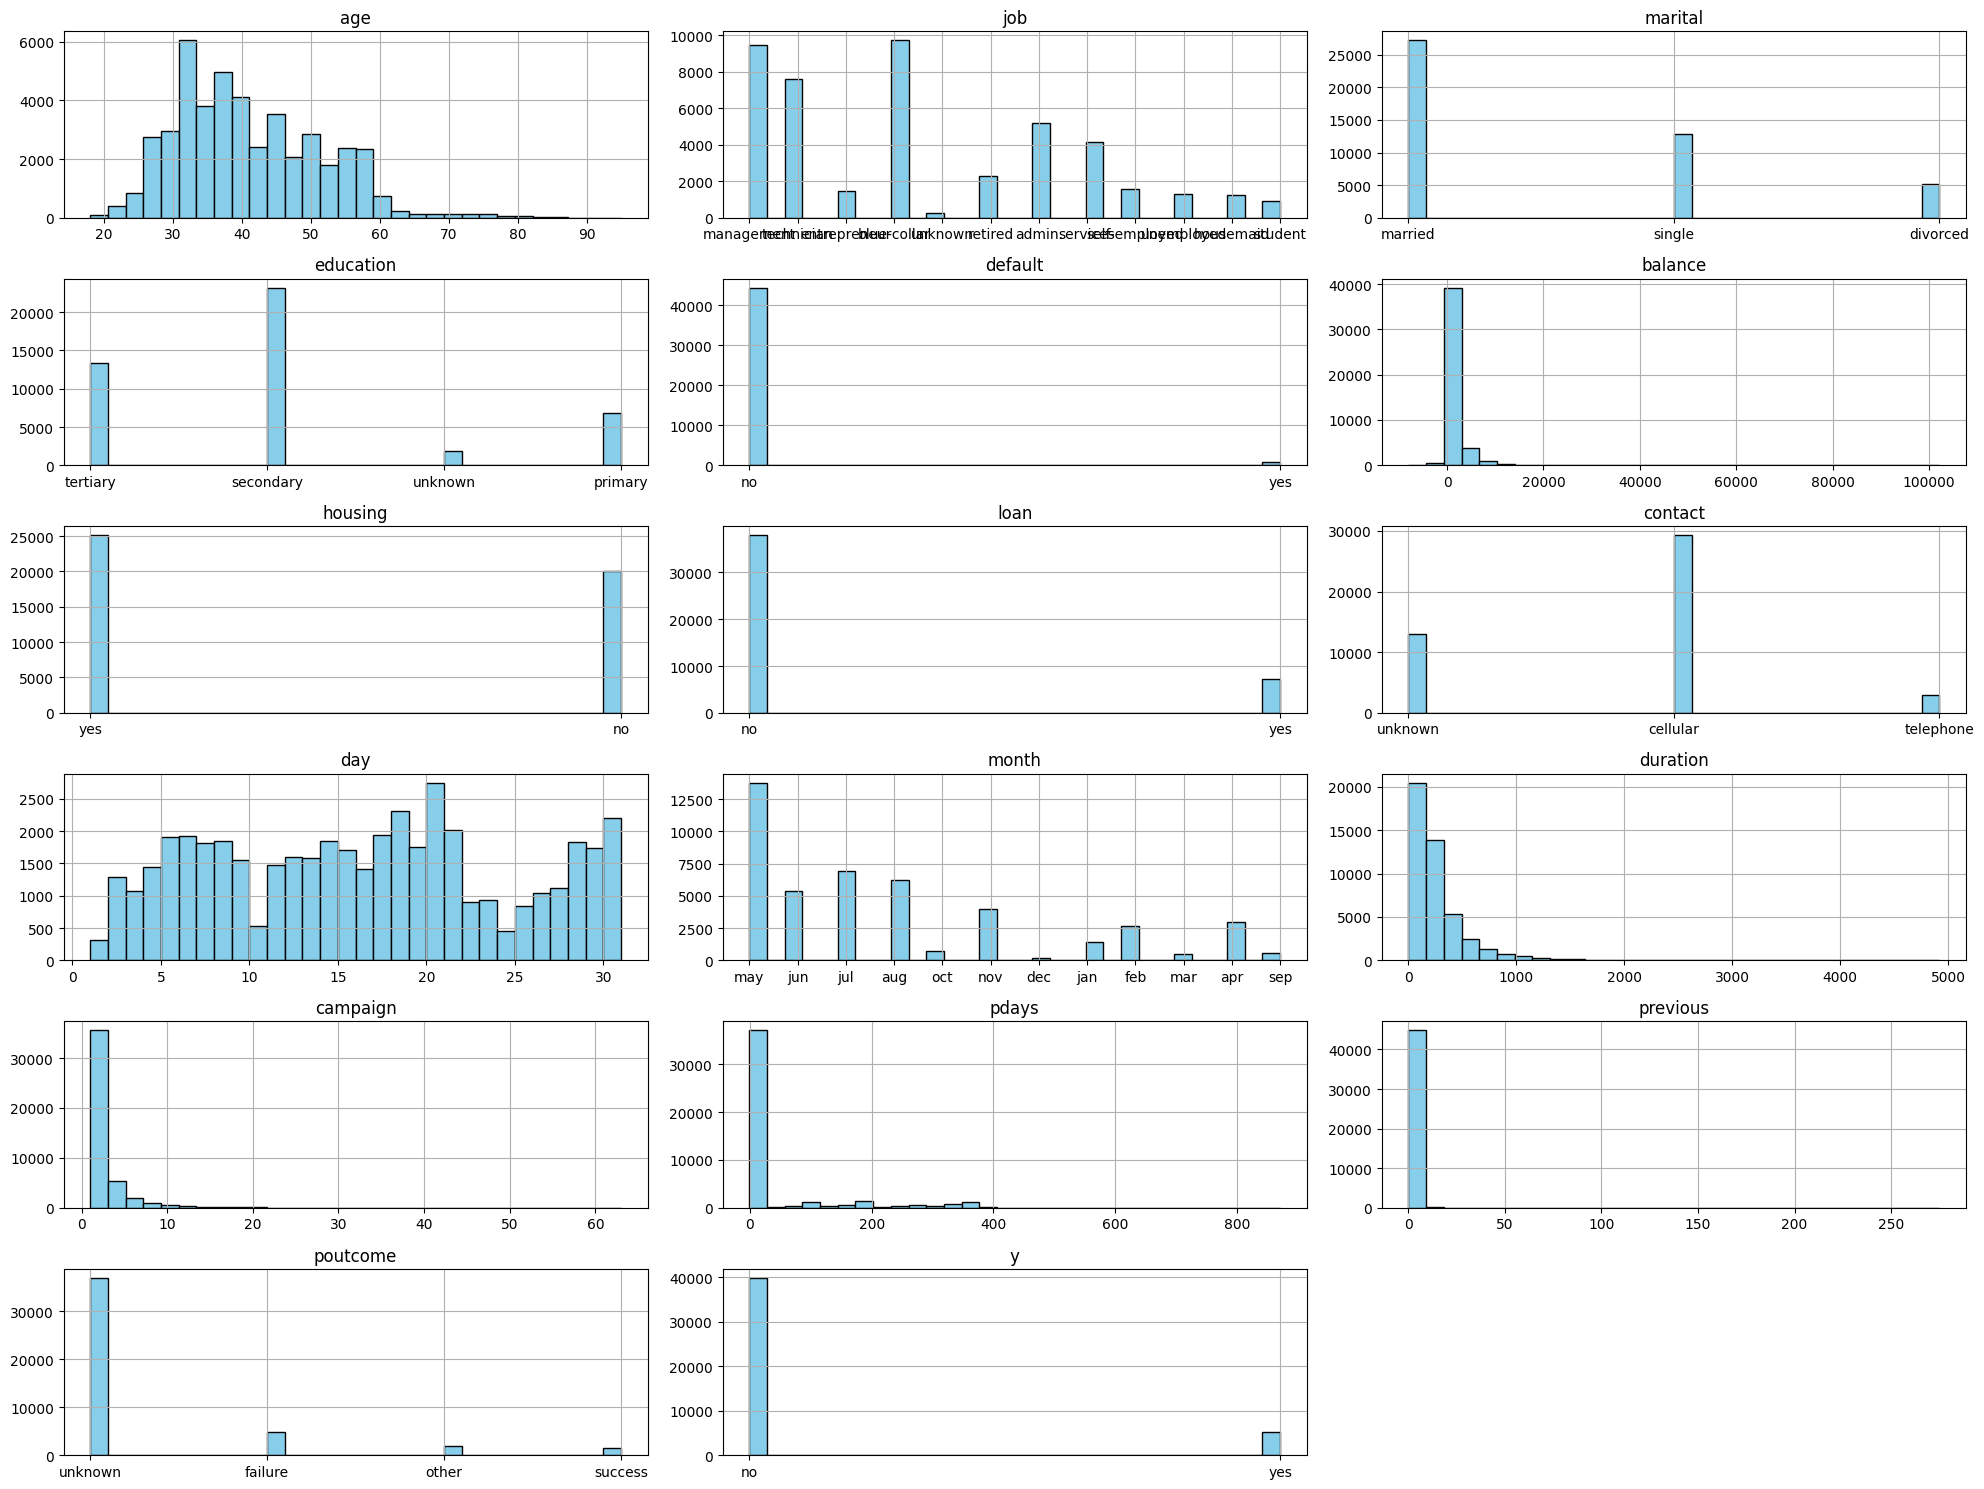

In [7]:
# Histogram of numerical variables
import matplotlib.pyplot as plt

# Create figure and axes
fig, axes = plt.subplots(len(df.columns) // 3 + 1, 3, figsize=(20, 15))
axes = axes.flatten()

# Loop through each column and plot histogram with borders
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, edgecolor='black', color='skyblue')
    axes[i].set_title(col)
    axes[i].grid(True)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Bivariate Analysis

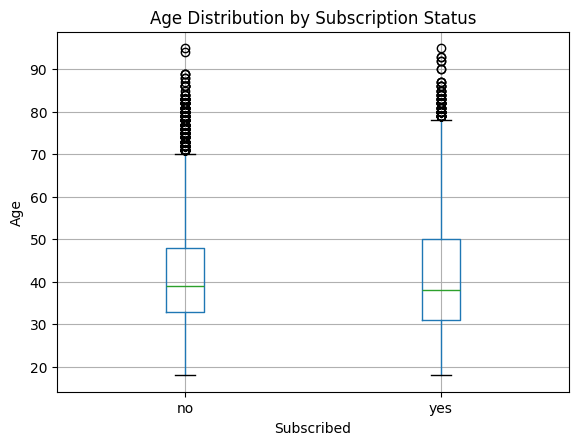

In [5]:
import matplotlib.pyplot as plt

df.boxplot(column='age', by='y')
plt.title('Age Distribution by Subscription Status')
plt.suptitle('')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.show()

# Multivariate Analysis


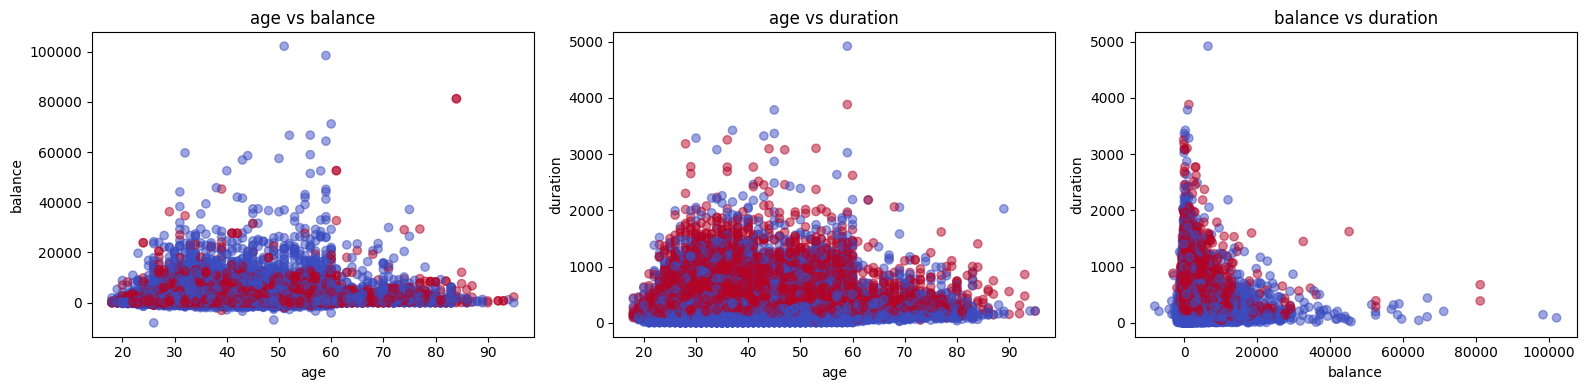

In [25]:
import matplotlib.pyplot as plt
import itertools

features = ['age', 'balance', 'duration']
target = df['y']
combinations = list(itertools.combinations(features, 2))

fig, axs = plt.subplots(1, len(combinations), figsize=(16, 4))
for i, (x, y) in enumerate(combinations):
    axs[i].scatter(df[x], df[y], c=target.map({'yes': 1, 'no': 0}), cmap='coolwarm', alpha=0.5)
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)
    axs[i].set_title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

In [26]:
# GroupBy and aggregation
df.groupby('job')['balance'].mean()

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

# Handling Missising/Anamalous Data


In [28]:
# Checking for missing values and decide
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64